## *Introduction to Neural Network Regression with TensorFlow*
> Predict a numerical variable based on some other combination of variables, even shorter...predicting a number

In [66]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


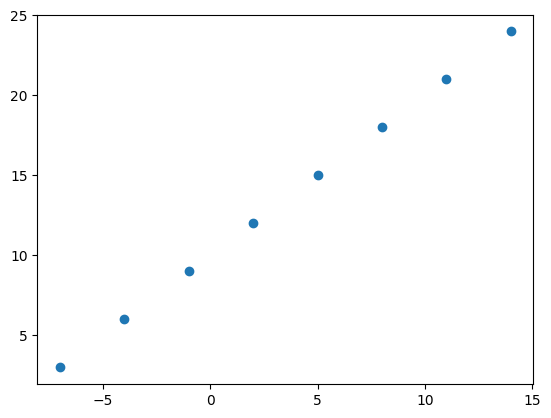

In [67]:
## Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])
# Visualize it
plt.scatter(X,y)

In [68]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [69]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [70]:
X[0], y[0]

(-7.0, 3.0)

In [71]:
X[1],y[1]

(-4.0, 6.0)

In [72]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [73]:
X[0].ndim

0

In [74]:
X[0], y[0]

(-7.0, 3.0)

In [75]:
# turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [76]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # scalars

(TensorShape([]), TensorShape([]))

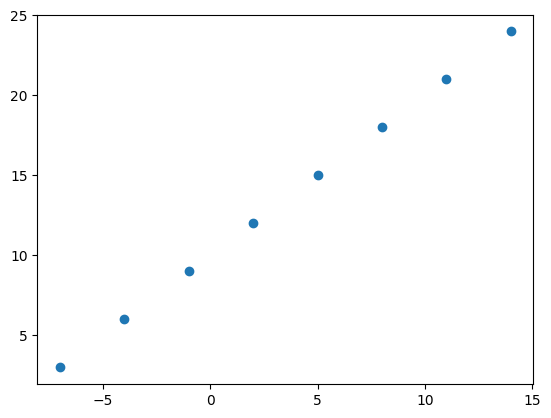

In [77]:
plt.scatter(X,y)

## Steps in modeling with TensorFlow
1. **Create a model** - define the input and output layers, as well as the
hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function, the optimizer, and evaluation metrics
3. **Fitting a model** - training data
4. **Evaluate the model** - testing data

In [78]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) # mean absolute error
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 267ms/step - loss: 19.2007 - mae: 19.2007
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 18.9195 - mae: 18.9195
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 18.6382 - mae: 18.6382
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 18.3570 - mae: 18.3570
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 18.0757 - mae: 18.0757


In [79]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [80]:
# Try and make a predictio with the model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 52ms/step


array([[-16.388016]], dtype=float32)

## Improving our model
We can improve our model by altering the steps we took to create the model
1. **Creating a model** - we might add more layers, increase the number of hidden units, or change the activation function of each layer
2. **Compiling a model** - we might change the optimization function or perhaps the *learning rate* of the optimization function
3. **Fitting a model** - we might fit a model for more *epochs* or on more data

In [81]:
!pwd

/content


In [82]:
# Let's rebuild our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 253ms/step - loss: 21.6967 - mae: 21.6967
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 21.3036 - mae: 21.3036
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 20.9104 - mae: 20.9104
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 20.5296 - mae: 20.5296
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 20.2484 - mae: 20.2484
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 19.9671 - mae: 19.9671
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 19.6859 - mae: 19.6859
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 19.4046 - mae: 19.4046
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 19.1234 - mae: 19.1234
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 18.8421 - mae: 18.8421
Epoch 11/100
1/1 [==============================] - 0s 8m

In [83]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [84]:
# Let's see if prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 47ms/step


array([[29.509977]], dtype=float32)

In [85]:
# Let's rebuild our model
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 725ms/step - loss: 13.0891 - mae: 13.0891
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 10.3959 - mae: 10.3959
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1276 - mae: 8.1276
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 5.8450 - mae: 5.8450
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 3.9614 - mae: 3.9614
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 4.8250 - mae: 4.8250
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 5.4002 - mae: 5.4002
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 5.3322 - mae: 5.3322
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 4.8385 - mae: 4.8385
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 4.1102 - mae: 4.1102
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss

In [86]:
model.predict([17.0]) # overfitting

1/1 [==============================] - 0s 105ms/step


array([[29.788841]], dtype=float32)

In [87]:
# Learning rate is one of the most important hyperparameters!!!

## Evaluating a Model


When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"
It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* the training of the mdoel - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [88]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [89]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

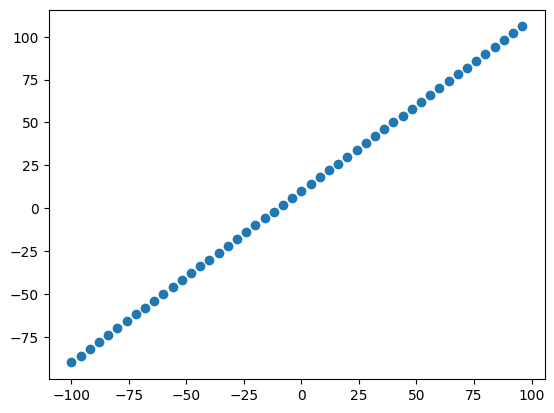

In [90]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

### The 3 sets...
* **Training set** - the model learns from this data 70-80%
* **Validation set** - model gets tuned on this data 10-15%
* **Test set** - model gets evaluated on this data 10-15%

In [91]:
# Check the length of how many samples we have
len(X)

50

In [92]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of data)
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]
len(X_train), len(X_test)

(40, 10)

### Visualizing the data
Now we've got our data in training and test sets

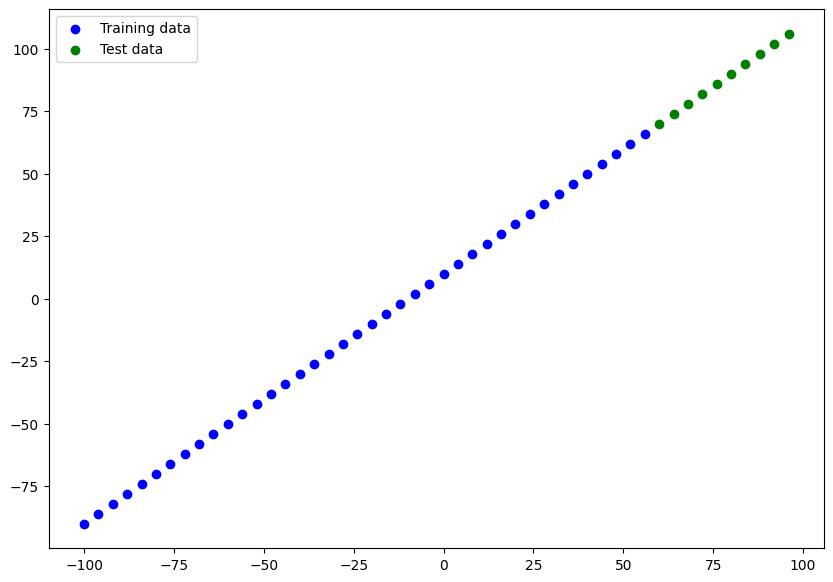

In [93]:
plt.figure(figsize=(10,7))
# Plot training data in blud
plt.scatter(X_train,y_train,c='b', label= "Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g",label="Test data")
plt.legend()

In [94]:
# How to build NN for our data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


## Visualizing the model

In [95]:
X_train.ndim

1

In [137]:
# Let's create a model which builds automatically by defining the input shape of the first layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation = 'relu', input_shape = [1] ,name='input_layer'),
    tf.keras.layers.Dense(1, name = 'output_layer')
  ], name = 'first_model'
)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

In [138]:
model.summary()

Model: "first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns); weights & biases
* Non-trainable params - these parameters aren't updated during training; typical of *transfer learning*

In [139]:
# Train model
model.fit(X_train,y_train, epochs=100,verbose=0)

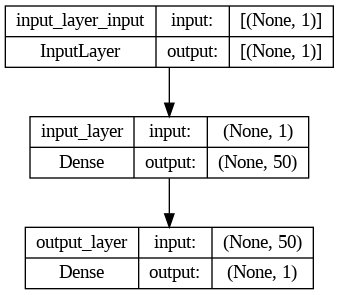

In [140]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

### Visualizing models Predictions
To visualize predictions, plot them against the truth labels

`y_test` or `y_true` vs `y_pred`

In [141]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 38ms/step


array([[ 74.16142 ],
       [ 79.03892 ],
       [ 83.91641 ],
       [ 88.793915],
       [ 93.6714  ],
       [ 98.5489  ],
       [103.42639 ],
       [108.30389 ],
       [113.18139 ],
       [118.05888 ]], dtype=float32)

In [142]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [143]:
# Create a plotting function because will likely use again in future
def plot_predictions(train_data = X_train, train_labels= y_train,
                     test_data = X_test, test_labels = y_test, predictions = y_pred):
  """
  Plots training data, test data and compares predictions to true labels
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="b", label= "Training data")
  plt.scatter(test_data, test_labels, c= 'g', label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label= "Predictions")
  # Show legend()
  plt.legend()


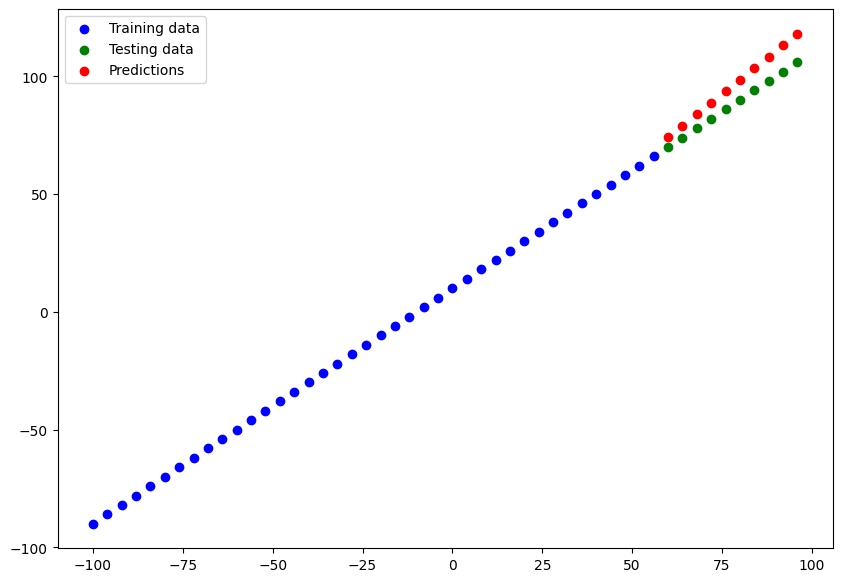

In [144]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

> Regression metrics:
* MAE - mean absolution error L1 norm
* MSE - mean square error L2 norm

In [145]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 74.16142 ,  79.03892 ,  83.91641 ,  88.793915,  93.6714  ,
        98.5489  , 103.42639 , 108.30389 , 113.18139 , 118.05888 ],
      dtype=float32)>

In [146]:
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))
print("MAE: %.3f\t MSE: %.3f" % (mae, mse))

MAE: 8.110	 MSE: 72.127


In [153]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true,tf.squeeze(y_pred))
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true,tf.squeeze(y_pred))



### Running experiments to improve our model
```
Build model-> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> ...
```
1. Get more data - more training data
2. Make your model larger (using more complex model) e.g. more units and/or more layers
3. Train for longer - epochs

Let's do 3 modelling experiments:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build** `model_1`

In [148]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [150]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 86.6876 - mae: 86.6876
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 51.2321 - mae: 51.2321
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 16.0345 - mae: 16.0345
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 8.5225 - mae: 8.5225
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0114 - mae: 11.0114
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1765 - mae: 10.1765
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1975 - mae: 9.1975
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1465 - mae: 9.1465
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 15.2267 - mae: 15.2267
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 7.8559 - mae: 7.8559
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 40ms/step


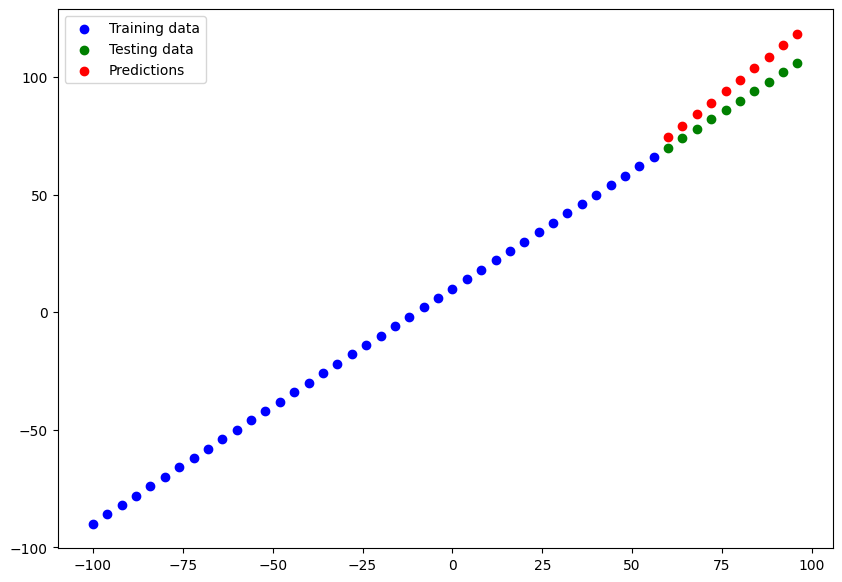

In [151]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [152]:
# Calculate model_1 evalutation metrics
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.452451>,
 <tf.Tensor: shape=(), dtype=float32, numpy=77.83873>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [ ]:
model_2 = tf.